In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [51]:
df = pd.read_csv('Car Ownership.csv')
df.head()

,Occupation,Monthly Income,Credit Score,Years of Employment,Finance Status,Finance History,Car,Number of Children
0,Teacher,40000,750.0,10,Good,No issues,Yes,2
1,Engineer,60000,800.0,8,Good,No issues,Yes,1
2,Nurse,25000,650.0,5,Fair,Late payment 2 months ago,No,0
3,Doctor,80000,900.0,12,Excellent,No issues,Yes,3
4,Businessman,100000,700.0,15,Good,Late payment 6 months ago,Yes,2


In [52]:
df.shape


(500, 8)

In [53]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Occupation           490 non-null    object 
 1   Monthly Income       487 non-null    object 
 2   Credit Score         460 non-null    float64
 3   Years of Employment  457 non-null    object 
 4   Finance Status       477 non-null    object 
 5   Finance History      472 non-null    object 
 6   Car                  480 non-null    object 
 7   Number of Children   375 non-null    object 
dtypes: float64(1), object(7)
memory usage: 31.4+ KB


In [54]:
null = pd.DataFrame({'Null Values':df.isnull().sum(),'Percentage Null Values':df.isnull().sum()*100/len(df)})
null

,Null Values,Percentage Null Values
Occupation,10,2.0
Monthly Income,13,2.6
Credit Score,40,8.0
Years of Employment,43,8.6
Finance Status,23,4.6
Finance History,28,5.6
Car,20,4.0
Number of Children,125,25.0


In [55]:
df.dropna(inplace=True)


In [56]:
#Target Variables - Car

1    207
0    108
Name: Car, dtype: int64


<AxesSubplot:xlabel='Car', ylabel='count'>

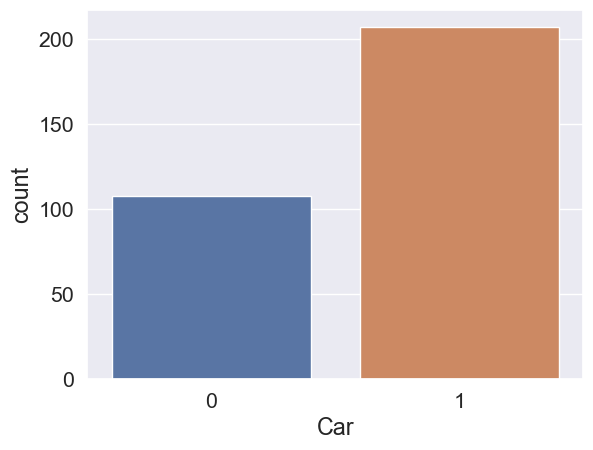

In [57]:
df['Car'] = df.Car.map({'Yes':1,'No':0})
print(df.Car.value_counts())
sns.countplot(data=df, x='Car')

In [58]:
#Categorical Variables

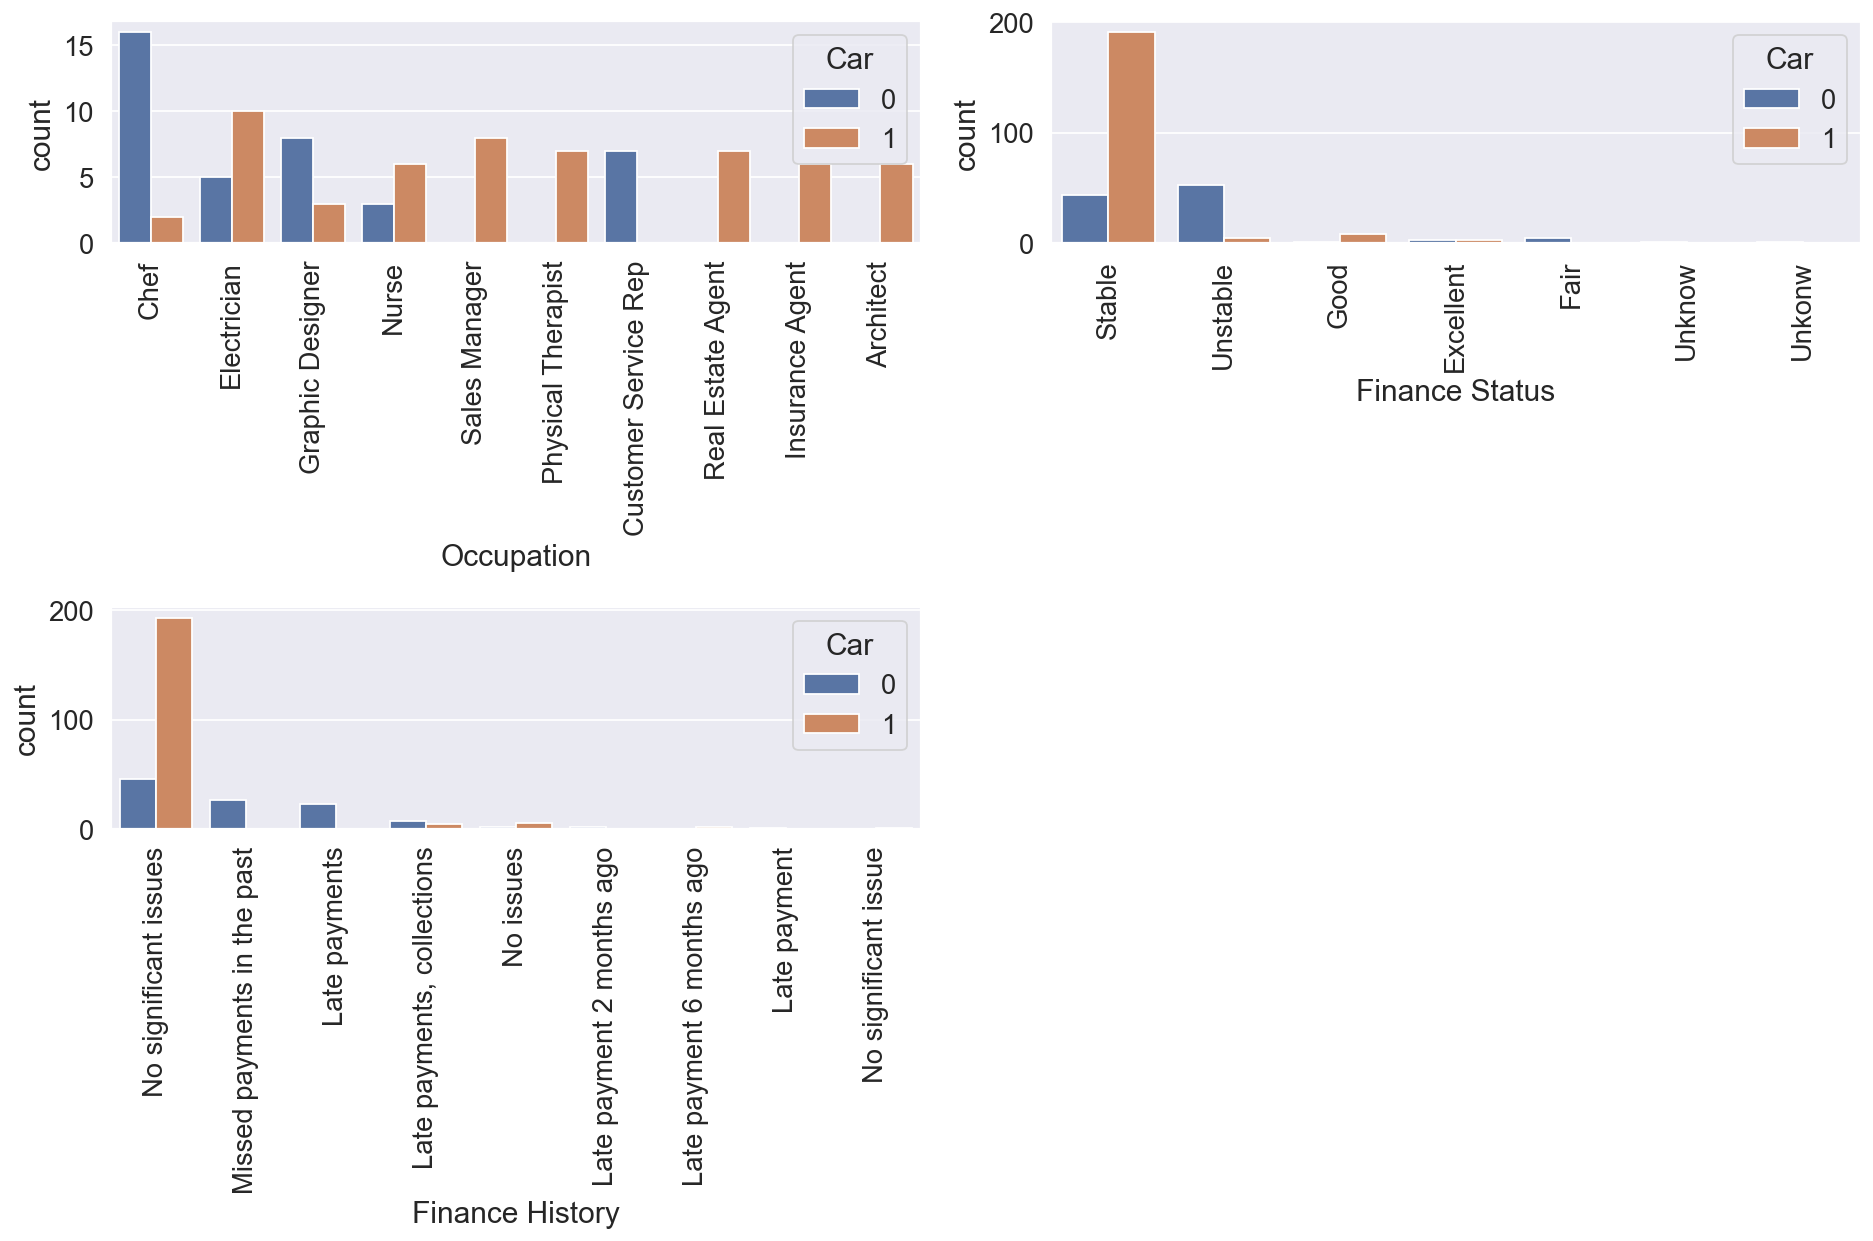

In [59]:
cat_col = ['Occupation','Finance Status','Finance History']
fig,ax = plt.subplots(dpi=128, figsize=(15,10))
for num,i in enumerate(cat_col,1):
    plt.subplot(2,2,num)
    sns.countplot(x=df[i],hue='Car',data=df,order=df[i].value_counts().head(10).index)
    plt.legend(title='Car',loc='upper right')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [60]:
#Data preparing

In [61]:
# Monthly Income column
df['Monthly Income'] = df['Monthly Income'].apply(lambda x:str(x).replace('$','').replace(',','').replace('USD','').replace('usd',''))
df['Monthly Income'] = df['Monthly Income'].apply(lambda x:str(x).rstrip())
df['Monthly Income'] = df['Monthly Income'].apply(lambda x:float(x[:-1])*1000 if x.endswith('k') else int(x))

# Years of Employment column
df['Years of Employment'] = df['Years of Employment'].apply(lambda x:str(x).replace(' years','').replace(' year','').replace(' y',''))

# Finance History column
df['Finance History'] = df['Finance History'].apply(lambda x:str(x).replace('No significant issues','No significant issue').replace('Late payments','Late payment'))

# Finance Status column
df['Finance Status'] = df['Finance Status'].apply(lambda x:str(x).replace('Unkonw','Unknow'))

In [62]:
#Credit score

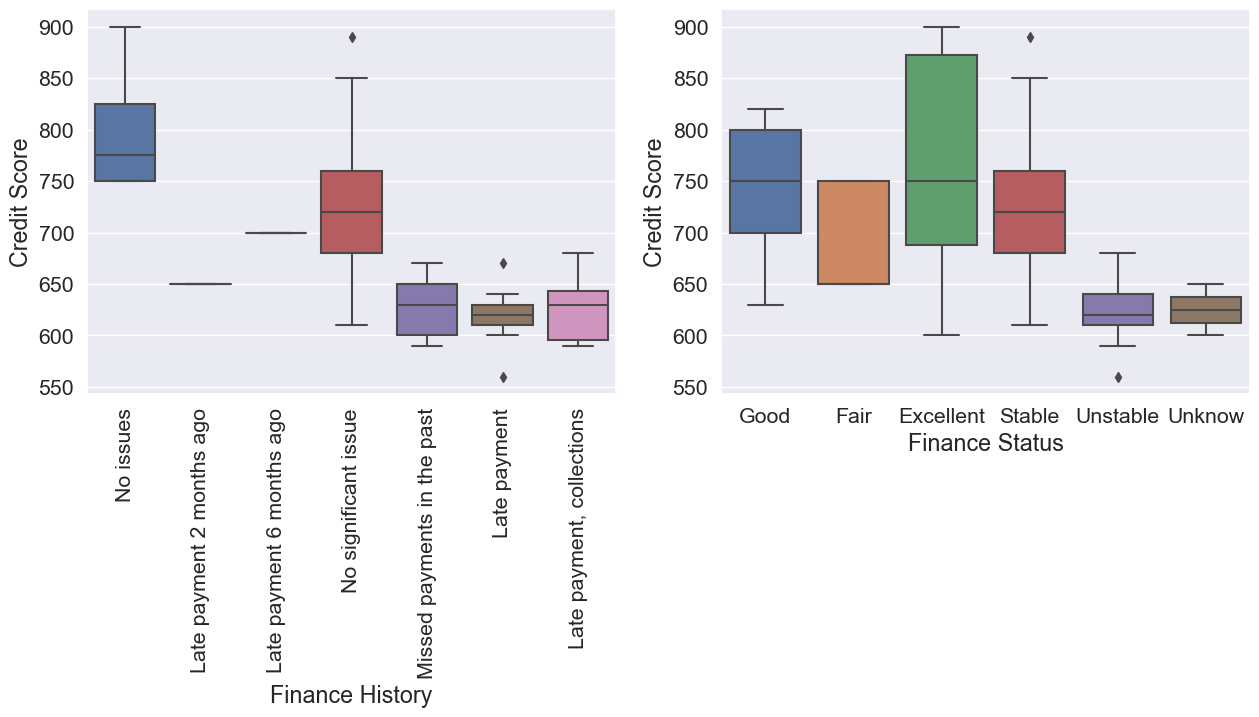

In [63]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=df,x='Finance History',y='Credit Score')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.boxplot(data=df,x='Finance Status',y='Credit Score')
plt.show()

In [64]:
#Occupation

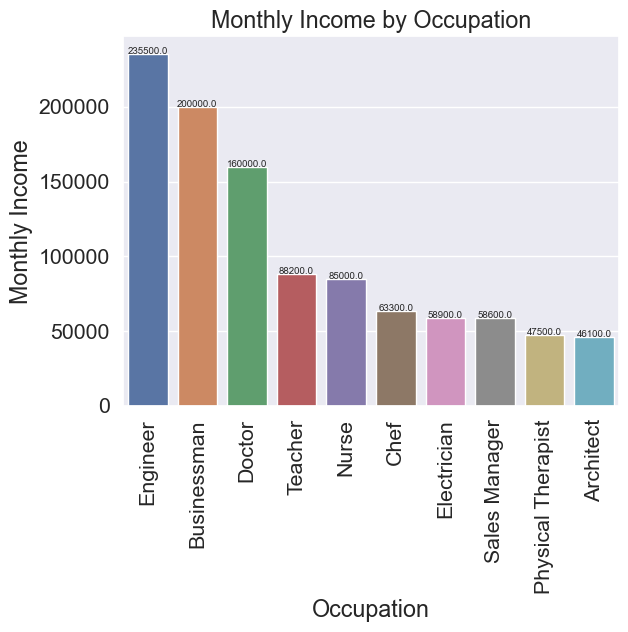

In [65]:
occ_income = df.groupby('Occupation')['Monthly Income'].sum().reset_index().sort_values('Monthly Income',ascending=False).head(10).reset_index(drop=True)

g = sns.barplot(data=occ_income,x='Occupation',y='Monthly Income')
for v in occ_income.itertuples():
    #print(v._2)
    g.text(x=v.Index,y=v._2,s=str(round(v._2, 2)), size=7, ha="center")
plt.title('Monthly Income by Occupation')
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Occupation'>

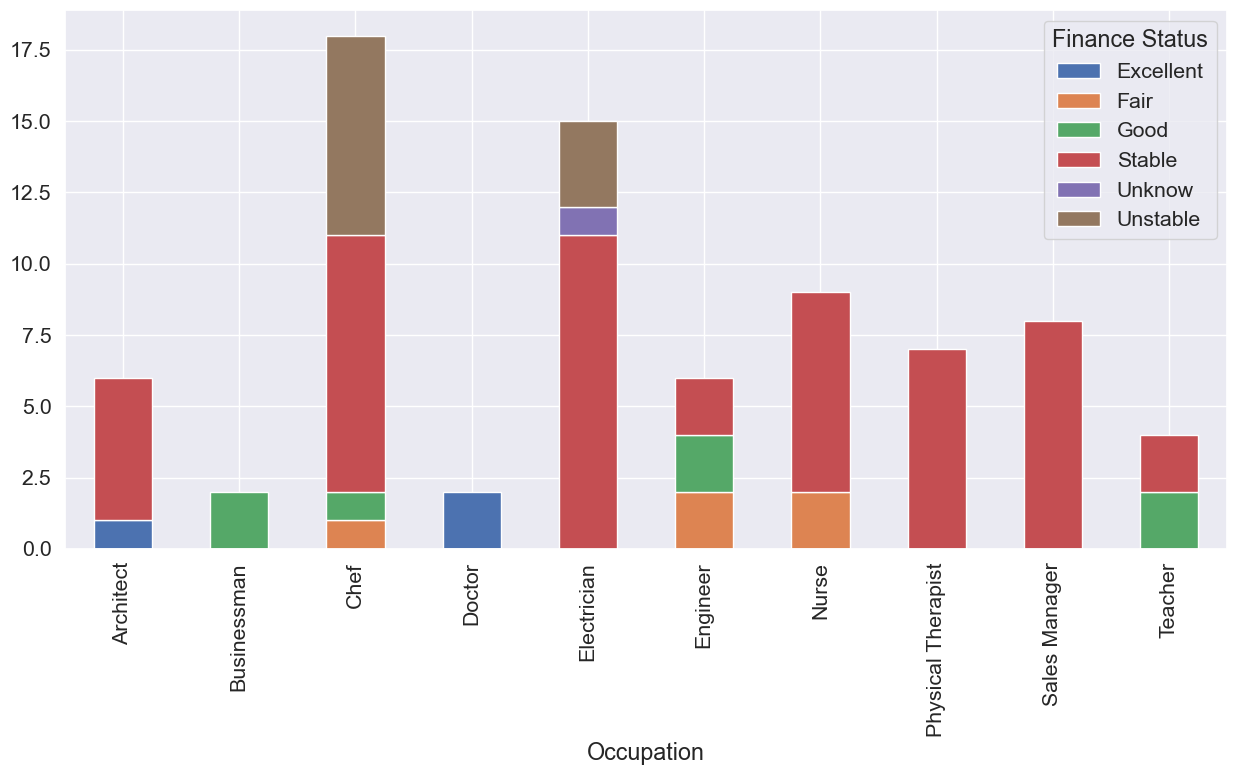

In [66]:
df1 = df[df['Occupation'].isin(occ_income.Occupation)]
df1.groupby('Occupation')['Finance Status'].value_counts().unstack().plot(kind='bar',stacked=True,figsize=(15,7))

In [67]:
#Data processing

In [68]:
df_copy = df[df['Number of Children']!='na']
df_copy['Number of Children'] = df_copy['Number of Children'].astype(int)
df_copy['Years of Employment'] = df_copy['Years of Employment'].astype(int)

In [69]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for c in df_copy.columns:
    if df_copy[c].dtype == 'object':
        df_copy[c] = le.fit_transform(df_copy[c])

In [70]:
X = df_copy.drop('Car',axis=1)
y = df_copy['Car']

In [71]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((228, 7), (58, 7), (228,), (58,))

In [72]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [73]:
#Model build

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_curve,roc_auc_score,confusion_matrix,classification_report

# Logistic regression

In [75]:
#logistic

In [76]:
#sklearn

Confusion matrix:
 [[ 9  5]
 [ 3 41]]
Outcome values:
 9 5 3 41
Classification report:
               precision    recall  f1-score   support

           1       0.89      0.93      0.91        44
           0       0.75      0.64      0.69        14

    accuracy                           0.86        58
   macro avg       0.82      0.79      0.80        58
weighted avg       0.86      0.86      0.86        58

Training Accuracy: 82.0 %
Accuracy: 86.2 %
Precision: 75.0 %
Recall: 64.3 %
F1 Score: 0.692
Specificity or True Negative Rate: 93.2 %
Balanced Accuracy: 78.8 %
roc_auc_score: 0.787


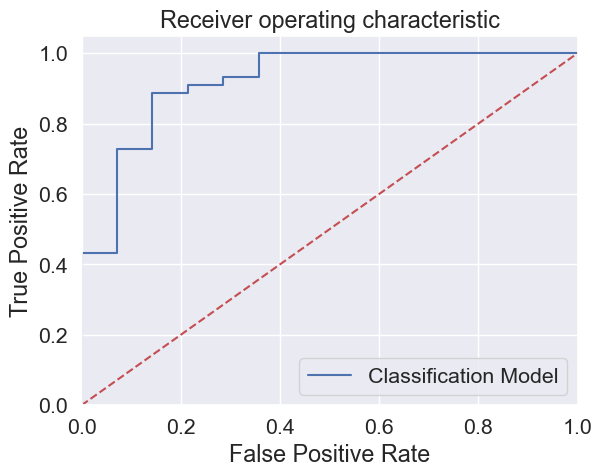

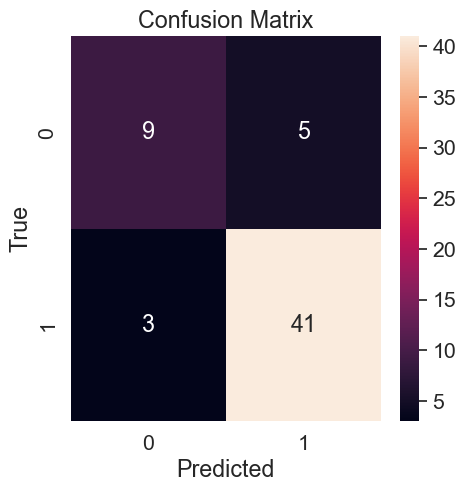

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

lr = LogisticRegression()

m = lr.fit(X_train, y_train)
train_prediction = m.predict(X_train) # Predict on the training data
prediction = m.predict(X_test)

# confusion matrix
matrix = confusion_matrix(y_test, prediction)
print('Confusion matrix:\n', matrix)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(y_test, prediction).reshape(-1)
print('Outcome values:\n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
C_Report = classification_report(y_test, prediction, labels=[1,0])
print('Classification report:\n', C_Report)

# calculating the metrics
sensitivity = round(tp/(tp+fn), 3)
specificity = round(tn/(tn+fp), 3)
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3)
balanced_accuracy = round((sensitivity+specificity)/2, 3)

precision = round(tp/(tp+fp), 3)
f1Score = round((2*tp/(2*tp + fp + fn)), 3)

train_accuracy = round(m.score(X_train, y_train), 3) # Calculate training accuracy

print('Training Accuracy:', train_accuracy*100,'%')
print('Accuracy:', round(accuracy*100, 2),'%')
print('Precision:', round(precision*100, 2),'%')
print('Recall:', round(sensitivity*100,2), '%')
print('F1 Score:', f1Score)
print('Specificity or True Negative Rate:', round(specificity*100,2), '%')
print('Balanced Accuracy:', round(balanced_accuracy*100, 2),'%')

# ROC Curve
print('roc_auc_score:', round(roc_auc_score(y_test, prediction), 3))

logit_roc_auc = roc_auc_score(y_test, prediction)
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

model_dict = {'Model Name' : 'Logistic Regression', 
              'True Positive' : tp, 
              'False Negative' : fn, 
              'False Positive' : fp,
              'True Negative' : tn,
              'Accuracy' : accuracy,
              'Precision' : precision,
              'Recall' : sensitivity,
              'F1 Score' : f1Score,
              'Specificity' : specificity,
              'ROC_AUC_Score':roc_auc_score(y_test, prediction),
              'Balanced Accuracy':balanced_accuracy,
              'Training Accuracy': train_accuracy}   

res = pd.DataFrame(model_dict, index=[0])

if not res.empty:
    # plot confusion matrix
    plt.figure(figsize=(5,5))
    sns.heatmap(matrix, annot=True, fmt='g')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


In [78]:
#logistic
#xgboost

Model is: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Predictions are : [0 0 1 1 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1
 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1]
Confusion matrix : 
 [[ 9  5]
 [ 6 38]]
Outcome values : 
 9 5 6 38
Classification report : 
        

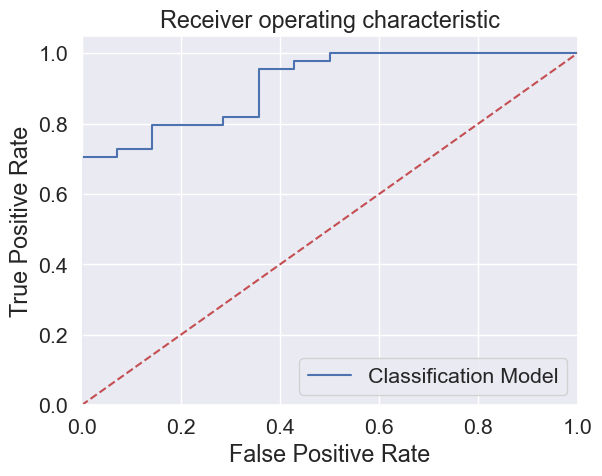

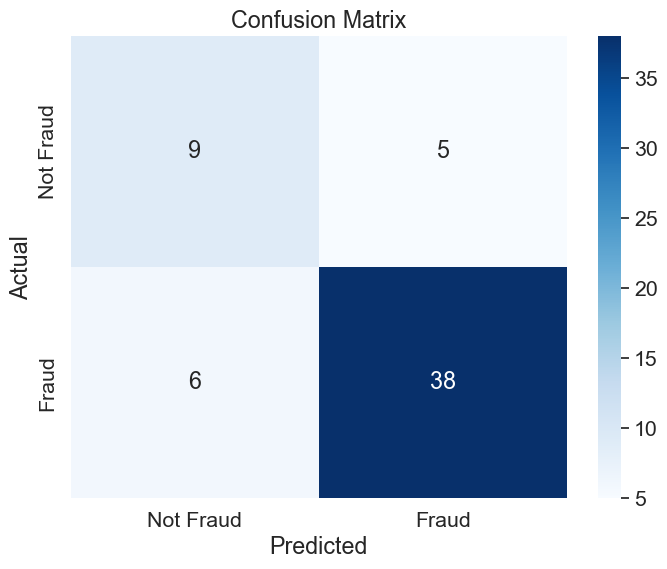

In [79]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, roc_auc_score, confusion_matrix, classification_report

res = pd.DataFrame()
xgb_model = xgb.XGBClassifier()

for model in [xgb_model]:
    print('Model is: {}'.format(model))
    m = model.fit(X_train, y_train)
    prediction = m.predict(X_test)
    print('Predictions are : {}'.format(prediction))

    # confusion matrix
    matrix = confusion_matrix(y_test, prediction)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn
    tp, fn, fp, tn = confusion_matrix(y_test, prediction).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy
    C_Report = classification_report(y_test, prediction, labels=[1,0])
    print('Classification report : \n', C_Report)

    # calculating the metrics
    sensitivity = round(tp/(tp+fn), 3)
    specificity = round(tn/(tn+fp), 3)
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3)
    balanced_accuracy = round((sensitivity+specificity)/2, 3)

    precision = round(tp/(tp+fp), 3)
    f1Score = round((2*tp/(2*tp + fp + fn)), 3)
    train_accuracy = round(model.score(X_train, y_train)*100, 2)

    print('Train Accuracy:', train_accuracy, '%')
    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    train_accuracy = round(model.score(X_train, y_train)*100, 2)


    # ROC Curve
    print('roc_auc_score:', round(roc_auc_score(y_test,prediction), 3))

    logit_roc_auc = roc_auc_score(y_test, prediction)
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('='*80)

    model_dict = {'Model Name' : model.__class__.__name__, 
                  'True Positive' : tp, 
                  'False Negative' : fn, 
                  'False Positive' : fp,
                  'True Negative' : tn,
                  'Accuracy' : accuracy,
                  'Precision' : precision,
                  'Recall' : sensitivity,
                  'F1 Score' : f1Score,
                  'Specificity' : specificity,
                  'ROC_AUC_Score':roc_auc_score(y_test, prediction),
                  'Balanced Accuracy':balanced_accuracy }   
    res = res.append(model_dict, ignore_index=True)

    
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='g', cmap='Blues', ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Not Fraud', 'Fraud'])
ax.yaxis.set_ticklabels(['Not Fraud', 'Fraud'])
plt.show()

print('='*80)
model_dict['Confusion Matrix Image'] = fig

res = res.append(model_dict, ignore_index=True)

# RandomForest

In [80]:
#Random forest

In [81]:
#sklearn

Confusion matrix : 
 [[12  2]
 [ 7 37]]
Outcome values : 
 12 2 7 37
Classification report : 
               precision    recall  f1-score   support

           1       0.95      0.84      0.89        44
           0       0.63      0.86      0.73        14

    accuracy                           0.84        58
   macro avg       0.79      0.85      0.81        58
weighted avg       0.87      0.84      0.85        58

Accuracy : 84.5 %
Train Accuracy: 99.56 %
Precision : 63.2 %
Recall : 85.7 %
F1 Score : 0.727
Specificity or True Negative Rate : 84.1 %
Balanced Accuracy : 84.9 %
roc_auc_score: 0.849


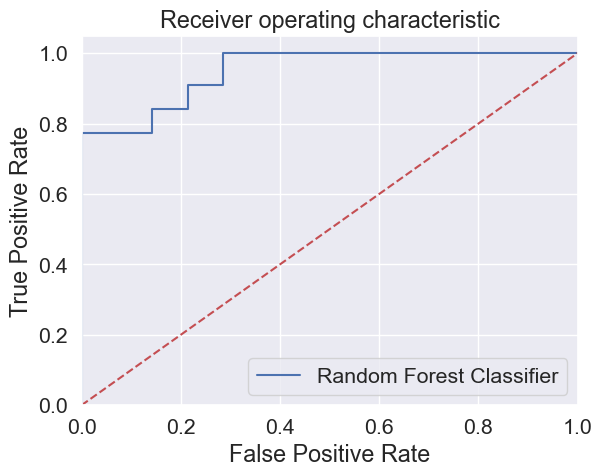

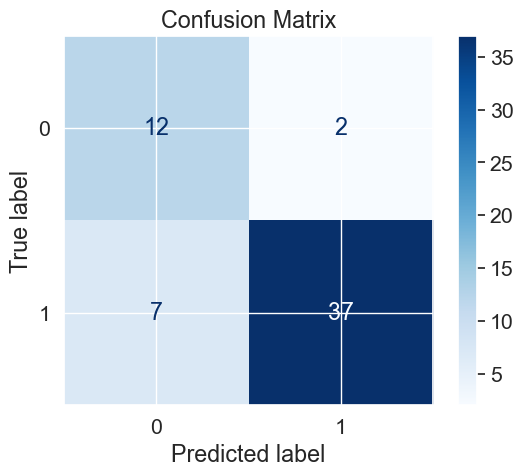

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, roc_auc_score, confusion_matrix, classification_report

rf = RandomForestClassifier()

m = rf.fit(X_train, y_train)
prediction = m.predict(X_test)

# confusion matrix
matrix = confusion_matrix(y_test, prediction)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(y_test, prediction).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
C_Report = classification_report(y_test, prediction, labels=[1,0])
print('Classification report : \n', C_Report)

# calculating the metrics
sensitivity = round(tp/(tp+fn), 3)
specificity = round(tn/(tn+fp), 3)
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3)
balanced_accuracy = round((sensitivity+specificity)/2, 3)
train_accuracy = round(model.score(X_train, y_train)*100, 2)

precision = round(tp/(tp+fp), 3)
f1Score = round((2*tp/(2*tp + fp + fn)), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Train Accuracy:', train_accuracy, '%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')


# ROC Curve
print('roc_auc_score:', round(roc_auc_score(y_test,prediction), 3))

logit_roc_auc = roc_auc_score(y_test, prediction)
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label= 'Random Forest Classifier' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
print('='*80)

model_dict = {'Model Name' : 'Random Forest Classifier', 
              'True Positive' : tp, 
              'False Negative' : fn, 
              'False Positive' : fp,
              'True Negative' : tn,
              'Accuracy' : accuracy,
              'Precision' : precision,
              'Recall' : sensitivity,
              'F1 Score' : f1Score,
              'Specificity' : specificity,
              'ROC_AUC_Score':roc_auc_score(y_test, prediction),
              'Balanced Accuracy':balanced_accuracy}   

res = pd.DataFrame(model_dict, index=[0])
from sklearn.metrics import plot_confusion_matrix


# plot confusion matrix
plot_confusion_matrix(rf, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [83]:
#Lightgbm

In [84]:
pip install lightgbm


Note: you may need to restart the kernel to use updated packages.


Confusion matrix : 
 [[ 9  5]
 [ 2 42]]
Outcome values : 
 9 5 2 42
Classification report : 
               precision    recall  f1-score   support

           1       0.89      0.95      0.92        44
           0       0.82      0.64      0.72        14

    accuracy                           0.88        58
   macro avg       0.86      0.80      0.82        58
weighted avg       0.88      0.88      0.87        58

Accuracy : 87.9 %
Train Accuracy: 99.56 %
Precision : 81.8 %
Recall : 64.3 %
F1 Score : 0.72
Specificity or True Negative Rate : 95.5 %
Balanced Accuracy : 79.9 %
roc_auc_score: 0.799


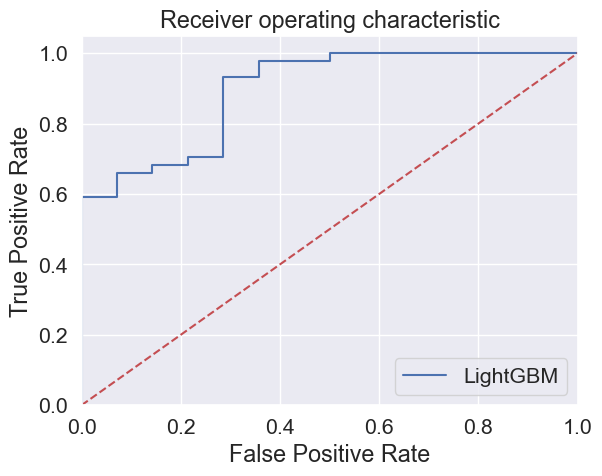

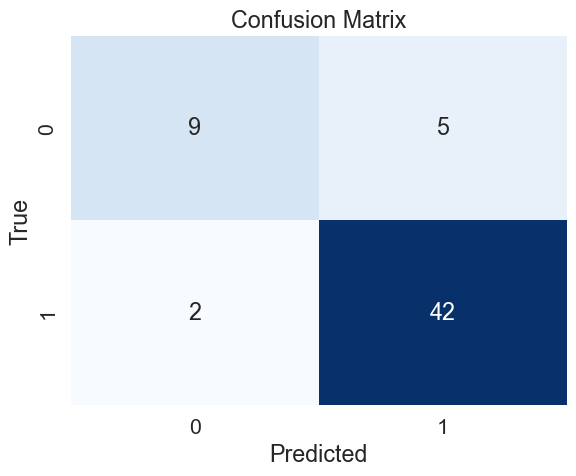

In [85]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, roc_auc_score, confusion_matrix, classification_report

lgbm = lgb.LGBMClassifier()

m = lgbm.fit(X_train, y_train)
prediction = m.predict(X_test)

# confusion matrix
matrix = confusion_matrix(y_test, prediction)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(y_test, prediction).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
C_Report = classification_report(y_test, prediction, labels=[1,0])
print('Classification report : \n', C_Report)

# calculating the metrics
sensitivity = round(tp/(tp+fn), 3)
specificity = round(tn/(tn+fp), 3)
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3)
balanced_accuracy = round((sensitivity+specificity)/2, 3)
train_accuracy = round(model.score(X_train, y_train)*100, 2)

precision = round(tp/(tp+fp), 3)
f1Score = round((2*tp/(2*tp + fp + fn)), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Train Accuracy:', train_accuracy, '%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')

# ROC Curve
print('roc_auc_score:', round(roc_auc_score(y_test,prediction), 3))

logit_roc_auc = roc_auc_score(y_test, prediction)
fpr, tpr, thresholds = roc_curve(y_test, lgbm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label= 'LightGBM' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
print('='*80)

model_dict = {'Model Name' : 'LightGBM', 
              'True Positive' : tp, 
              'False Negative' : fn, 
              'False Positive' : fp,
              'True Negative' : tn,
              'Accuracy' : accuracy,
              'Precision' : precision,
              'Recall' : sensitivity,
              'F1 Score' : f1Score,
              'Specificity' : specificity,
              'ROC_AUC_Score':roc_auc_score(y_test, prediction),
              'Balanced Accuracy':balanced_accuracy}   

res = pd.DataFrame(model_dict, index=[0])

import matplotlib.pyplot as plt
import seaborn as sns

# confusion matrix
matrix = confusion_matrix(y_test, prediction)

# plot confusion matrix
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
